In [1]:
#importing all the deemed-to-be-necessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
#read the dataset
BikeSharing_read = pd.read_csv("day.csv")

In [3]:
#Checking the metadata like shape,size,fields etc
BikeSharing_read.shape

(730, 16)

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
info_df = pd.DataFrame(BikeSharing_read.dtypes, columns=['Data Type'])
info_df['Null Values'] = BikeSharing_read.isnull().sum()
info_df['Unique Values'] = BikeSharing_read.nunique()
print(info_df)

           Data Type  Null Values  Unique Values
instant        int64            0            730
dteday        object            0            730
season         int64            0              4
yr             int64            0              2
mnth           int64            0             12
holiday        int64            0              2
weekday        int64            0              7
workingday     int64            0              2
weathersit     int64            0              3
temp         float64            0            498
atemp        float64            0            689
hum          float64            0            594
windspeed    float64            0            649
casual         int64            0            605
registered     int64            0            678
cnt            int64            0            695


In [5]:
BikeSharing_read.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [6]:
BikeSharing_read.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# checking for duplicate records
duplicate_rows = BikeSharing_read[BikeSharing_read.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [8]:
# There are no duplicate records and missing values, hence we proceed further
# Renaming some fields for better understaning

BikeSharing_read.columns = ['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temperature', 'feel_temperature', 'humidity', 'windspeed',
       'casual_users', 'registered_users', 'bike_count']

In [9]:

# Retaining only relevant fields


In [10]:
BikeSharing_read.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temperature', 'feel_temperature', 'humidity',
       'windspeed', 'casual_users', 'registered_users', 'bike_count'],
      dtype='object')

In [11]:
# Going by data dictionary, we can drop "instant" field because it is just Record indicator

# Since bike_count = casual_users + registered_users and bike_count itself is the dependent variable, we can drop the rest two.

# Applying some business context - All the information covered in "date" is covered in "weekday" , "workingday", "month" and "year" and these
# four fields give more information than date field. So we will hence drop "date" as we are not doing any time-series trends like stock prices
# Also, holiday, workingday, weekday these 3 variables may be correlated but we retain them for now and can take a decision at model build stage
# whether to drop or not based on VIF data

# We also see that month and season are related since months comprise seasons. However, I have retained both for teh simple reason that if the 
# demand for bikes is not season specific but month specific, we may loose out on this correlation.We can take a decision at model build stage
# whether to drop or not based on VIF data

BikeSharing_df = BikeSharing_read.drop(columns=['instant', 'date', 'casual_users', 'registered_users'])


In [12]:
# Going by data dictionary, it looks like tenperature and feel_temperature might be related. Higher the temperature, higher will be the felt temperature.
#But we must verify the correlation first

correlation = BikeSharing_df['temperature'].corr(BikeSharing_df['feel_temperature'])

print(f'Correlation: {correlation}')

Correlation: 0.9916961786905648


In [13]:
#Also working day and holiday seem to be complimentary. Lets check correlation for those as well
correlation2 = BikeSharing_df['holiday'].corr(BikeSharing_df['workingday'])
print(f'Correlation: {correlation2}')

Correlation: -0.25294774532876585


In [14]:
# As we rightly suspected, temperature and feel_temperature are highly correlated. We will drop feel_temperature to avoid multicolinearity
# and skewed analysis. However, since correl is just -0.25 for holiday and working day, we retain them both for now

BikeSharing_df = BikeSharing_df.drop(columns=['feel_temperature'])

In [15]:
# Data Preparation and Transformation

# Going by data dictionary, some are categorical variables but are indicated in numerics. To enhance clarity, we will map some of them to 
# labels that we can understand

BikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
BikeSharing_df.weather.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
BikeSharing_df.month.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sep',10: 'oct',11: 'nov',12: 'dec'}, inplace = True)
BikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace = True)



In [16]:
# Check final data frame

BikeSharing_df.shape

(730, 11)

In [17]:
BikeSharing_df.dtypes

season          object
year             int64
month           object
holiday          int64
weekday         object
workingday       int64
weather         object
temperature    float64
humidity       float64
windspeed      float64
bike_count       int64
dtype: object

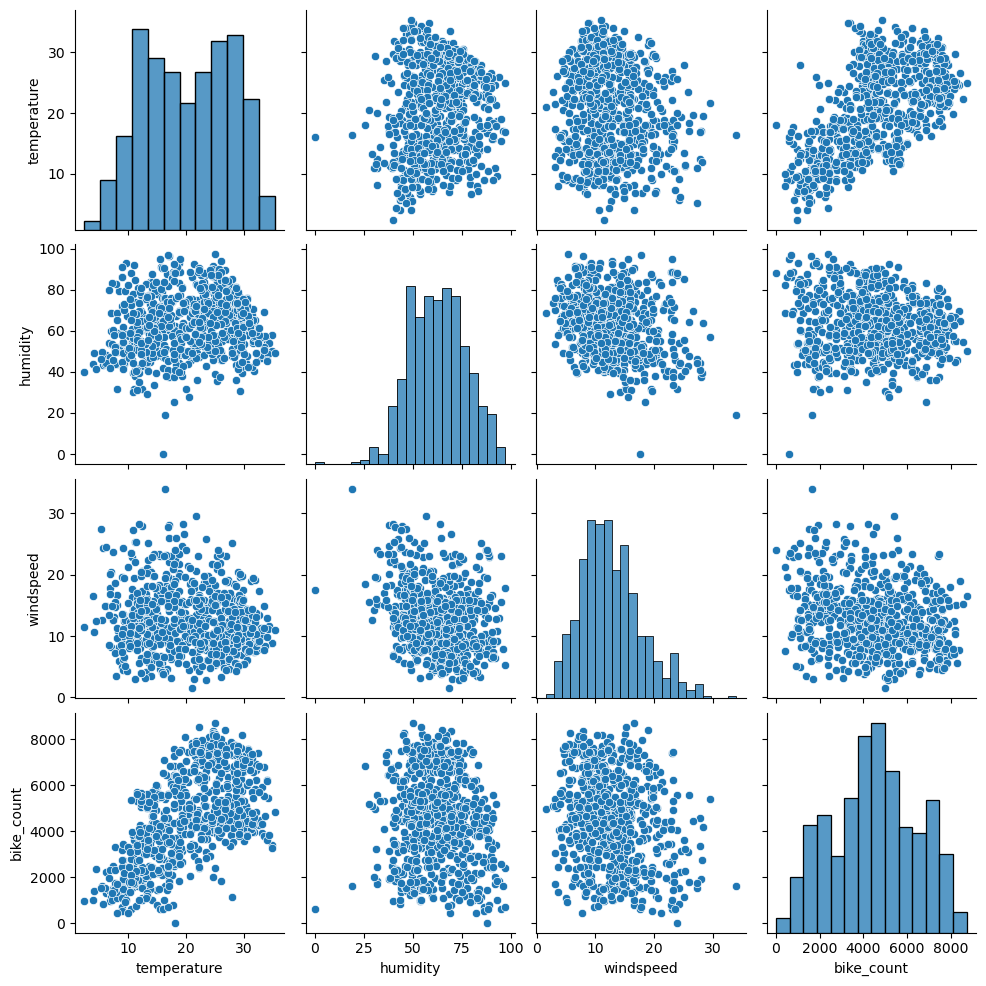

In [18]:
# We take season, month, weekday, workingday, holiday, year and weather as categorical variables and the rest as continuous
# We can now Visualise the numeric/continuous data to get an initial data understanding
categorical = ['holiday', 'workingday', 'weekday', 'weather','month', 'season','year' ]
BikeSharing_df_numeric = BikeSharing_df.drop(columns=categorical)
sns.pairplot(BikeSharing_df_numeric)
plt.show()


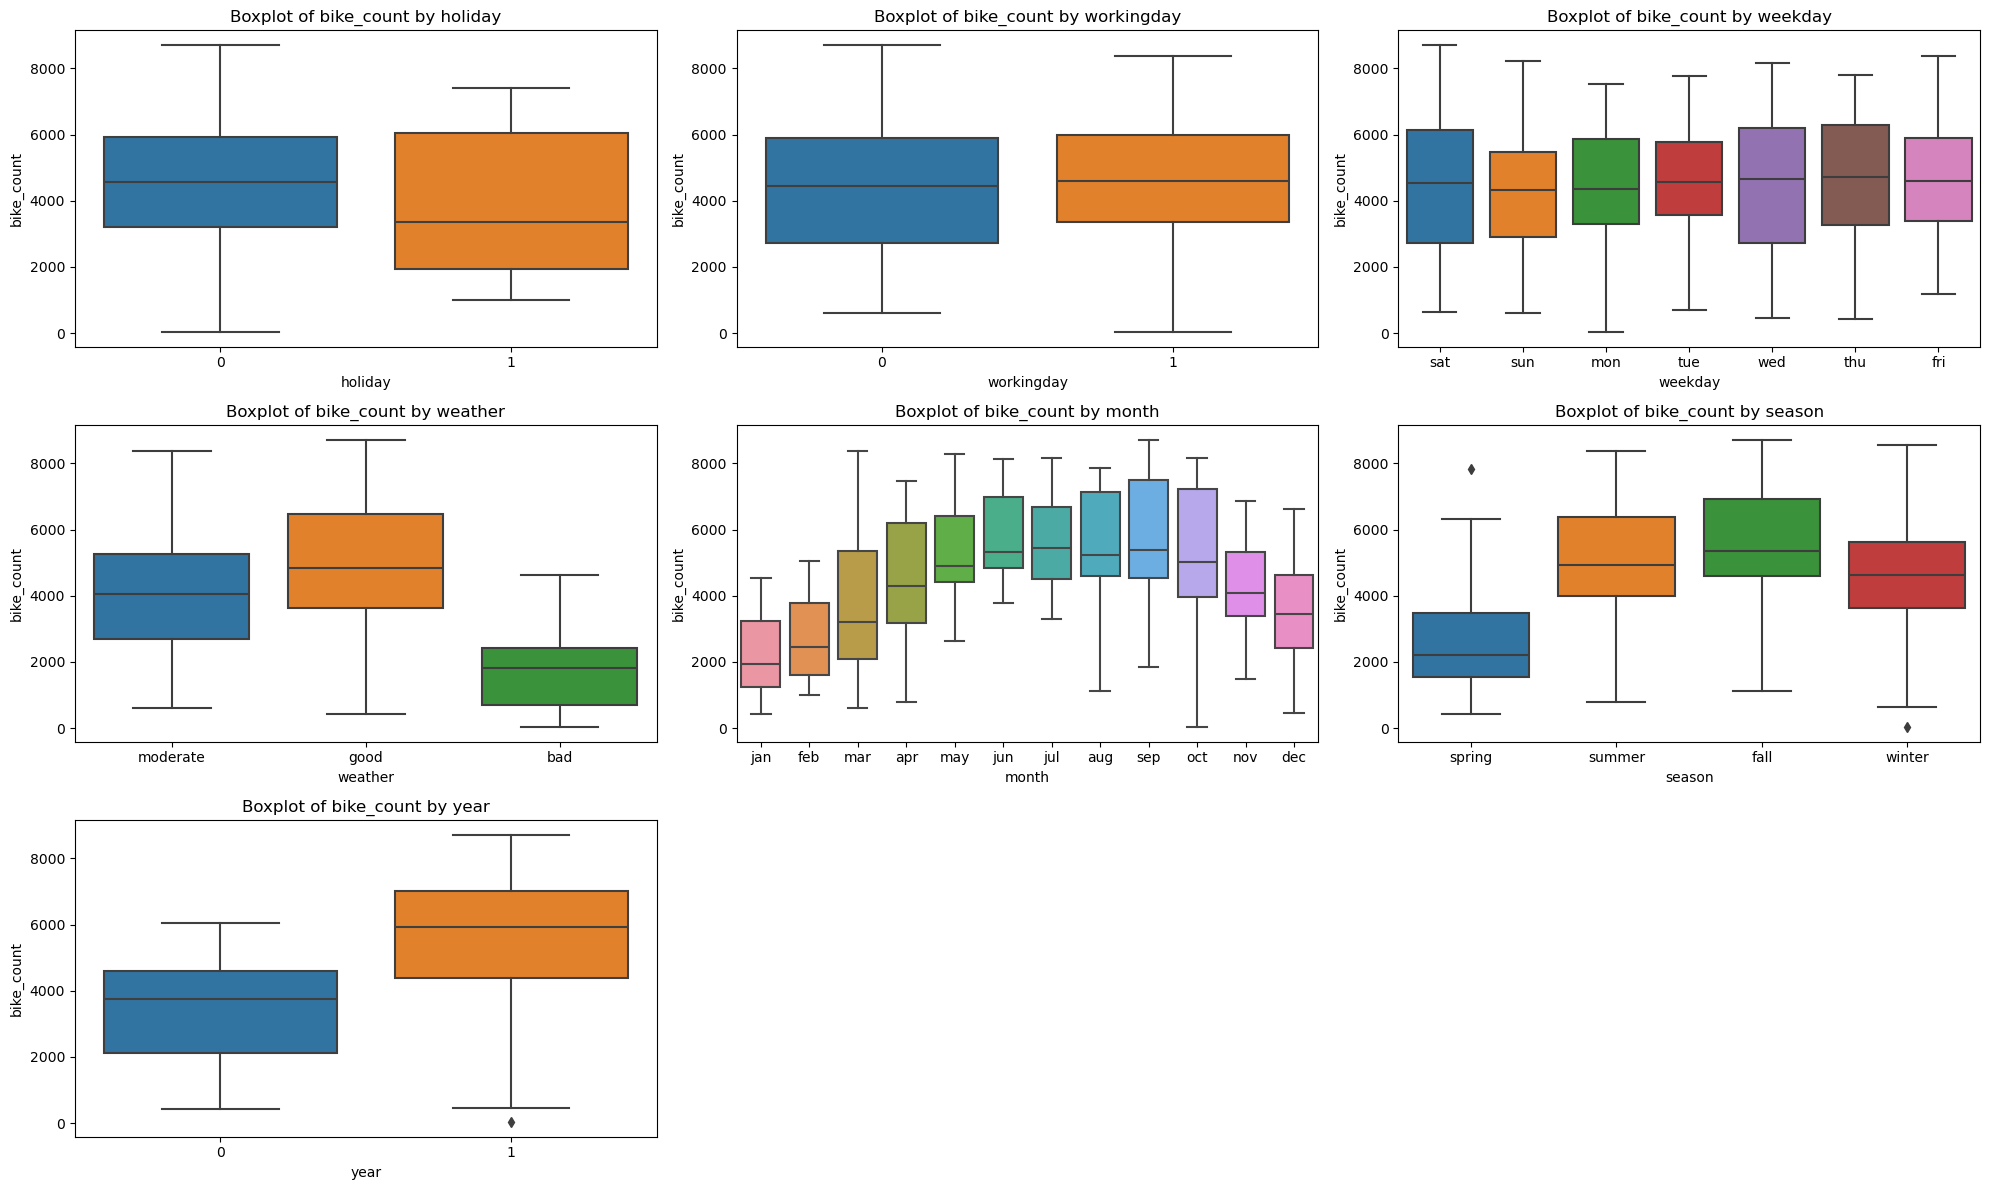

In [19]:
# Also visualising the categorical data

def plot_boxplots(df, categorical_vars):
    num_vars = len(categorical_vars)
    num_cols = 3
    num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate the number of rows needed
    
    plt.figure(figsize=(20, 12))
    
    for i, var in enumerate(categorical_vars):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(x=var, y='bike_count', data=df)
        plt.title(f'Boxplot of bike_count by {var}')
    
    plt.tight_layout()
    plt.show()

plot_boxplots(BikeSharing_df, categorical)

In [20]:
# Observations from EDA (plots)

In [21]:
#1.	Bike demand shows strong seasonality with the months May to October or Summer and Fall seasons having higher Bike counts. Highest for Jun-sep and fall season.
#2.	weather being good (clear with less clouds) is a driver for higher bike counts
#3.	The day being a holiday impacts the bike demand negatively (looking at the mean, not the spread or stdev)
#4.	year 2019 has higher bike demand than 2018. This was already mentioned in problem statement and also inferred from the box plot
#5.  The variable temperature (temp) seems to have the highest correlation with bike_count (cnt). 

In [22]:
# For the categorical variables, we assign dummy variables

BikeSharing_df = pd.get_dummies(BikeSharing_df, columns=['month', 'weekday', 'season', 'weather'], drop_first=True, dtype=int)

In [23]:
# Verifying newly created variables

BikeSharing_df.shape

(730, 29)

In [24]:
BikeSharing_df.head()

,year,holiday,workingday,temperature,humidity,windspeed,bike_count,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weather_good,weather_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0


In [25]:
# Rounding off temperature, humidity and windspeed to 2 decimals

BikeSharing_df[['temperature', 'humidity', 'windspeed']] = BikeSharing_df[['temperature', 'humidity', 'windspeed']].round(2)

In [26]:
BikeSharing_df.head()

,year,holiday,workingday,temperature,humidity,windspeed,bike_count,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weather_good,weather_moderate
0,0,0,0,14.11,80.58,10.75,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,14.90,69.61,16.65,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,0,0,1,8.05,43.73,16.64,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,0,0,1,8.20,59.04,10.74,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,1,9.31,43.70,12.52,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0


In [27]:
# Test - Train split. We are taking 70% of data to build the model and have the remaining 30% for testing of the model

np.random.seed(0)
BikeSharing_df_train, BikeSharing_df_test = train_test_split(BikeSharing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
BikeSharing_df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,510.0,0.507843,0.500429,0.00,0.000,1.00,1.0000,1.00
holiday,510.0,0.025490,0.157763,0.00,0.000,0.00,0.0000,1.00
workingday,510.0,0.676471,0.468282,0.00,0.000,1.00,1.0000,1.00
temperature,510.0,20.102529,7.431096,2.42,13.605,20.21,26.6200,35.33
humidity,510.0,63.112725,14.156652,0.00,52.270,63.44,73.2475,97.04
windspeed,510.0,12.831392,5.291729,2.83,9.040,12.08,15.7500,34.00
bike_count,510.0,4486.382353,1952.158739,22.00,3120.000,4530.00,5973.5000,8714.00
month_aug,510.0,0.096078,0.294988,0.00,0.000,0.00,0.0000,1.00
month_dec,510.0,0.084314,0.278131,0.00,0.000,0.00,0.0000,1.00
month_feb,510.0,0.066667,0.249689,0.00,0.000,0.00,0.0000,1.00


In [29]:
# Looking at the Min and Max of each field, we must scale Temperature, windspeed and humidity along with the depnedent variable

scaler = MinMaxScaler()

num_vars = ['temperature', 'humidity', 'windspeed', 'bike_count']


# Fit the scaler on training data and transform the num_vars
# Scaler is fitted to the values in 'num_vars' columns of df_train,
# transforming them to the specified range and then scaling df_test based on training data.
BikeSharing_df_train[num_vars] = scaler.fit_transform(BikeSharing_df_train[num_vars])
BikeSharing_df_test[num_vars] = scaler.transform(BikeSharing_df_test[num_vars])
BikeSharing_df_test.head()  # Display the first few rows to verify the transformation

,year,holiday,workingday,temperature,humidity,windspeed,bike_count,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weather_good,weather_moderate
184,0,1,0,0.831662,0.657358,0.084376,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901246,0.610161,0.153994,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
299,0,0,1,0.512002,0.837696,0.334296,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
221,0,0,1,0.881495,0.437139,0.339750,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
152,0,0,1,0.817381,0.314303,0.537376,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [30]:
BikeSharing_df_train.describe()

,year,holiday,workingday,temperature,humidity,windspeed,bike_count,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weather_good,weather_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537300,0.650378,0.320866,0.513620,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.243137,0.245098,0.24902,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.225801,0.145885,0.169770,0.224593,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.429398,0.430568,0.43287,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339866,0.538644,0.199230,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540565,0.653751,0.296760,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735339,0.754818,0.414501,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


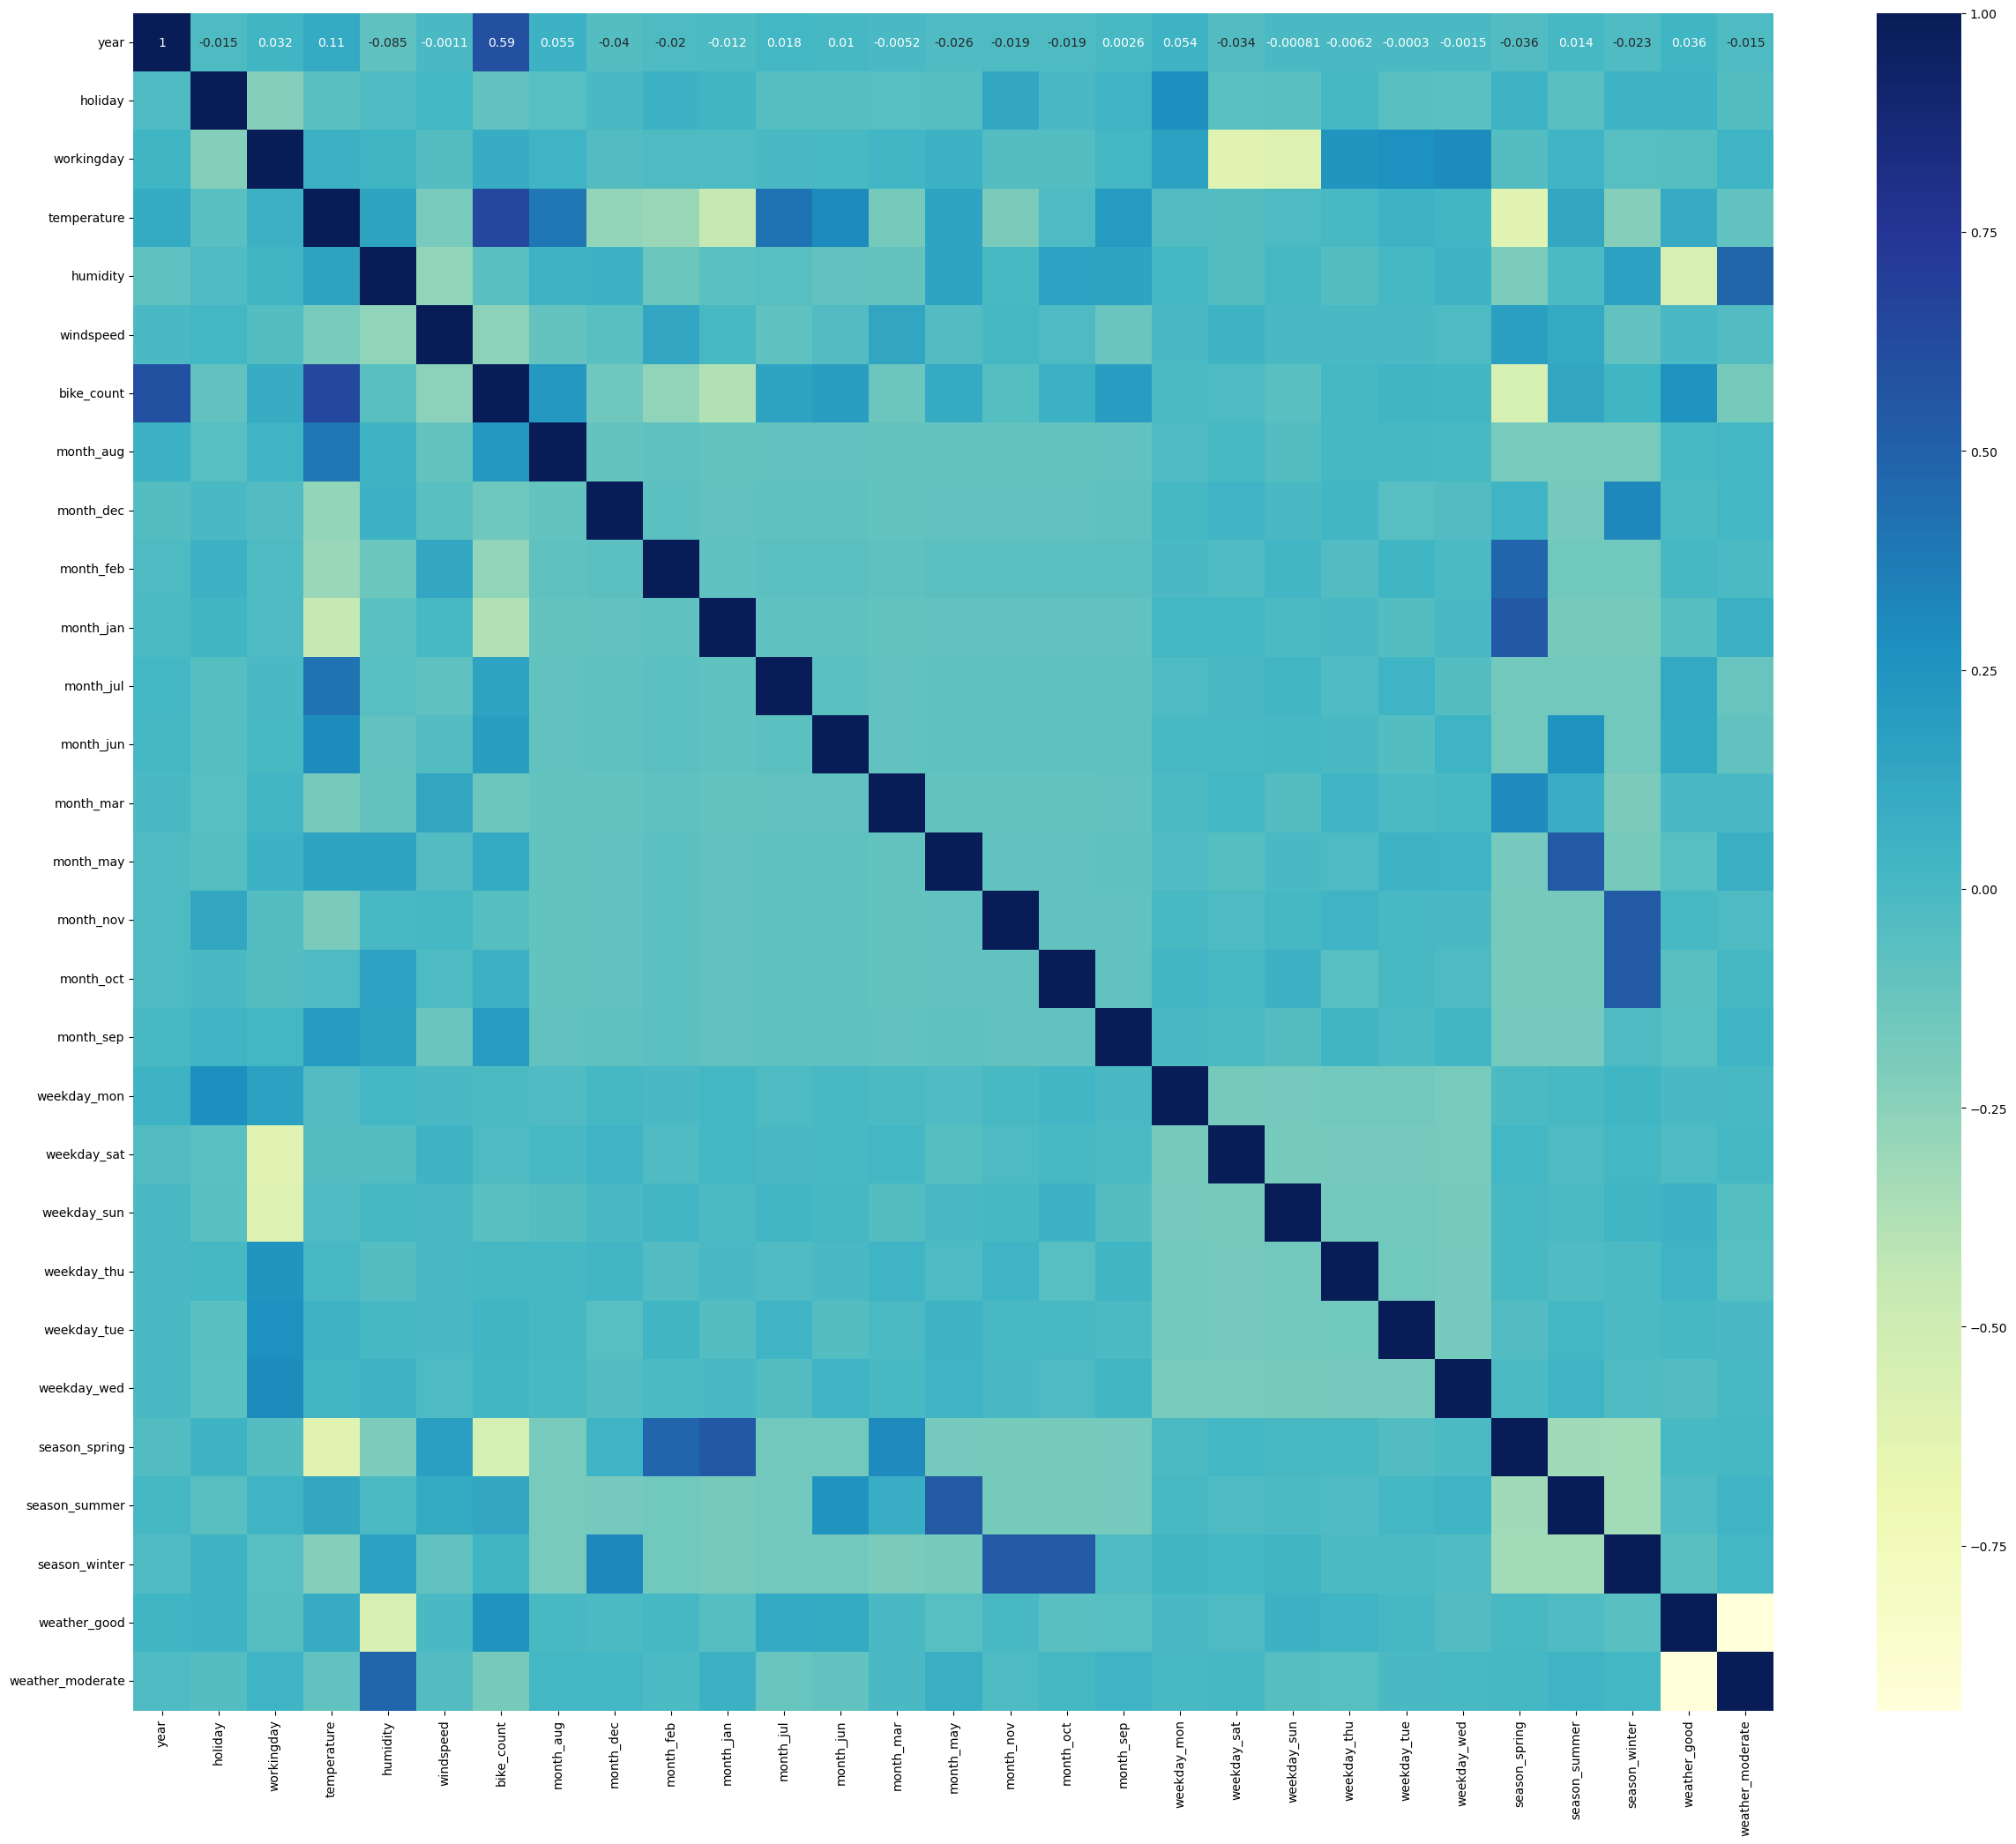

In [31]:
# Min and Max of all fields are 0 and 1 respectively so scaling is validated. We check the correlations once

plt.figure(figsize=(30, 25))
sns.heatmap(BikeSharing_df_train.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 10})  
plt.show()

In [32]:
# I am unable to display labels due to some reason but the colours are evident. Darker the colour more the correlation. So Year and Temperature show the highest correlation with Bike count

# We will now divide onto X and Y sets by dropping bike_count to proceed for final data prep for model building

y_train = BikeSharing_df_train.pop('bike_count')
X_train = BikeSharing_df_train



In [33]:
y_test = BikeSharing_df_test.pop('bike_count')
X_test = BikeSharing_df_test

In [34]:
X_train.columns

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_spring', 'season_summer',
       'season_winter', 'weather_good', 'weather_moderate'],
      dtype='object')

In [35]:
y_train.shape

(510,)

In [36]:
X_train.shape

(510, 28)

In [37]:
# Model building starts

X_train_sm = sm.add_constant(X_train) # Add a Constant otherwise model will give a regression line passing through origin
first_lr = sm.OLS(y_train, X_train_sm) 
first_lr_model = first_lr.fit() 
first_lr_model.params

const               0.039151
year                0.232111
holiday            -0.041533
workingday          0.045394
temperature         0.450560
humidity           -0.151337
windspeed          -0.186528
month_aug           0.014434
month_dec          -0.045604
month_feb          -0.032302
month_jan          -0.062801
month_jul          -0.040314
month_jun          -0.002941
month_mar           0.001050
month_may           0.023948
month_nov          -0.041858
month_oct           0.007528
month_sep           0.081060
weekday_mon        -0.020897
weekday_sat         0.044911
weekday_sun        -0.009620
weekday_thu        -0.009229
weekday_tue        -0.018868
weekday_wed        -0.005377
season_spring      -0.048157
season_summer       0.038730
season_winter       0.105851
weather_good        0.257435
weather_moderate    0.196365
dtype: float64

In [38]:
# Show the summary opf parameters
first_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bike_count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.87e-182
Time:                        15:44:11   Log-Likelihood:                 527.94
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0392      0.043      0.908      0.364      -0.046       0.124
year                 0.2321      0.008     28.818      0.000       0.216       0.248
holiday             -0.0415      0.025     -1.666      0.096      -0.091       0.007
workingday           0.0454      0.014      3.323      0.001       0.019       0.072
temperature          0.4506      0.046      9.732      0.000       0.360       0.542
humidity            -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed           -0.1865      0.026     -7.258      0.000      -0.237      -0.136
month_aug            0.0144      0.034      0.429      0.668      -0.052       0.081
month_dec           -0.0456      0.034     -1.358      0.175      -0.112       0.020
month_feb           -0.0323      0.033     -0.982      0.326      -0.097       0.032
month_jan           -0.0628      0.034     -1.873      0.062      -0.129       0.003
month_jul           -0.0403      0.035     -1.150      0.251      -0.109       0.029
month_jun           -0.0029      0.025     -0.117      0.907      -0.052       0.046
month_mar            0.0010      0.025      0.043      0.966      -0.047       0.049
month_may            0.0239      0.021      1.140      0.255      -0.017       0.065
month_nov           -0.0419      0.036     -1.152      0.250      -0.113       0.030
month_oct            0.0075      0.036      0.210      0.833      -0.063       0.078
month_sep            0.0811      0.032      2.533      0.012       0.018       0.144
weekday_mon         -0.0209      0.015     -1.365      0.173      -0.051       0.009
weekday_sat          0.0449      0.015      3.038      0.003       0.016       0.074
weekday_sun         -0.0096      0.015     -0.627      0.531      -0.040       0.021
weekday_thu         -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_tue         -0.0189      0.015     -1.218      0.224      -0.049       0.012
weekday_wed         -0.0054      0.015     -0.361      0.718      -0.035       0.024
season_spring       -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer        0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter        0.1059      0.028      3.794      0.000       0.051       0.161
weather_good         0.2574      0.026      9.777      0.000       0.206       0.309
weather_moderate     0.1964      0.025      7.868      0.000       0.147       0.245
==============================================================================
Omnibus:                       84.476   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.387
Skew:                          -0.804   Prob(JB):                     7.70e-52
Kurtosis:                       5.914   Cond. N

In [39]:
# R square of 0.85 is very good correlation.
# Check VIF for multicollinearity

def calculateVIF(df):
    
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

vif_results = calculateVIF(X_train)
print(vif_results)

            Features     VIF
2         workingday  127.61
18       weekday_sat   29.04
19       weekday_sun   27.49
23     season_spring   10.79
26      weather_good   10.58
25     season_winter    9.50
27  weather_moderate    9.16
24     season_summer    8.29
3        temperature    7.12
14         month_nov    6.80
15         month_oct    6.59
6          month_aug    6.43
1            holiday    6.16
9          month_jan    5.90
7          month_dec    5.68
10         month_jul    5.66
16         month_sep    4.94
8          month_feb    4.39
12         month_mar    3.47
11         month_jun    2.83
13         month_may    2.22
4           humidity    2.05
17       weekday_mon    1.96
22       weekday_wed    1.93
20       weekday_thu    1.81
21       weekday_tue    1.79
5          windspeed    1.24
0               year    1.06


In [40]:
# however when we look at VIF we have so much multicolinearity which is clearly undesirable even if R Square is high.
# Since we have 28 features we can do an automated RFE by halving the features (eliminate 14)
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=14)  # Running RFE
rfe = rfe.fit(X_train, y_train)

# Output feature names, support status, and rankings
feature_selection_results = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [41]:

#feature_selection_results

In [42]:
# Following were selected to be retained
support_Col = X_train.columns[rfe.support_]
support_Col

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'month_jul', 'month_sep', 'weekday_sat', 'weekday_sun', 'season_spring',
       'season_winter', 'weather_good', 'weather_moderate'],
      dtype='object')

In [43]:
# Following were rejected, to be dropped
unsupport_Col = X_train.columns[~rfe.support_]
unsupport_Col

Index(['month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'season_summer'],
      dtype='object')

In [44]:
X_train_rfe = X_train[support_Col]

In [45]:
X_train_rfe.head()

,year,holiday,workingday,temperature,humidity,windspeed,month_jul,month_sep,weekday_sat,weekday_sun,season_spring,season_winter,weather_good,weather_moderate
653,1,0,1,0.509875,0.575330,0.300930,0,0,0,0,0,1,1,0
576,1,0,1,0.815254,0.725680,0.264678,1,0,0,0,0,0,1,0
426,1,0,0,0.442419,0.640148,0.255374,0,0,1,0,1,0,0,1
728,1,0,0,0.245214,0.498042,0.663138,0,0,0,1,1,0,1,0
482,1,0,0,0.395624,0.504534,0.188643,0,0,1,0,0,0,0,1


In [46]:
col1 = X_train.columns[rfe.support_]

#Subsetting training data for 14 selected columns
X_train_rfe1 = X_train[col1]
X_test_rfe1 = X_test[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_test_rfe1 = sm.add_constant(X_test_rfe1)

In [47]:
# Fitting the model again after RFE elimination
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:             bike_count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          3.87e-190
Time:                        15:44:11   Log-Likelihood:                 511.43
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0408      0.037  

In [48]:
# Check VIF again for multicollinearity


vif_results = calculateVIF(X_train_rfe1)
print(vif_results)

            Features    VIF
2            holiday    inf
3         workingday    inf
9        weekday_sat    inf
10       weekday_sun    inf
13      weather_good  10.21
14  weather_moderate   8.83
4        temperature   2.99
11     season_spring   2.55
5           humidity   1.89
12     season_winter   1.78
7          month_jul   1.30
6          windspeed   1.18
8          month_sep   1.11
1               year   1.03
0              const   0.00


In [49]:
# As we rightly suspected in the beginning, holiday, workingday, weekday fields are having inf VIF because of multicolinearity
# Also, Weather_good and Weather_moderate are having high VIF as they may be correlated with temperature and humidity
# We drop the above fields and proceed for final model


columns_to_drop = ['holiday', 'workingday', 'weekday_sat', 'weekday_sun', 'weather_good','weather_moderate' ]
#columns_to_drop = ['season_spring', 'weather_good','weather_moderate' ]
X_train_final = X_train_rfe1.drop(columns=columns_to_drop)
X_test_final = X_test_rfe1.drop(columns=columns_to_drop)


In [50]:
lm1 = sm.OLS(y_train, X_train_final).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             bike_count   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     260.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          6.15e-173
Time:                        15:44:11   Log-Likelihood:                 456.58
No. Observations:                 510   AIC:                            -895.2
Df Residuals:                     501   BIC:                            -857.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4143      0.033     12.708

In [51]:
# We also check VIF one final time to be sure that there is no multicolinearity

vif_results = calculateVIF(X_train_final)
print(vif_results)

        Features    VIF
0          const  54.50
2    temperature   2.86
7  season_spring   2.52
8  season_winter   1.73
5      month_jul   1.29
3       humidity   1.17
4      windspeed   1.12
6      month_sep   1.10
1           year   1.03


In [52]:
# Observations : 
# R Squared got reduced to 0.8 but that is ok since we want to avoid multicolinearity
# All P values < 0.05 which does not necessiate any variable to be further removed
# Durbin-Watson = 1.95 which is ~2 so almost no autocolinearity and independence assumption of Linear regression is maintained.
# We can now go for prediction
# All VIF values are < 5 (not counting constant) so no multicolinearity

In [53]:
# We take this as final model and
# Step-1: Predict y based on x, using our lr_model
y_train_pred = lm1.predict(X_train_final)

In [54]:
# We have to check if teh residuals are normally distributed with mean around 0

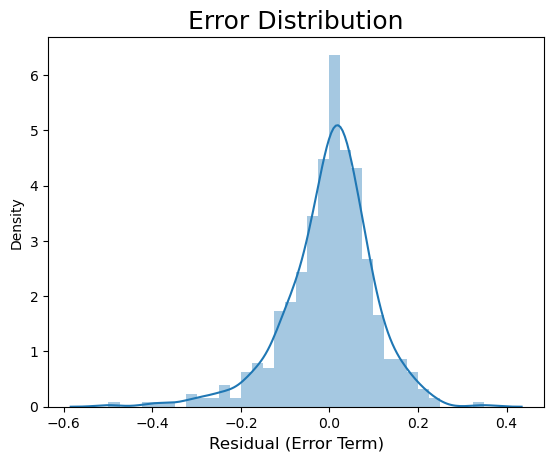

In [55]:
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 12})
plt.title('Error Distribution', fontdict={'fontsize': 18})
plt.show()

In [56]:
# The residuals graph is good we can proceed further
# Predict test

y_test_pred = lm1.predict(X_test_final)
y_test_pred

184    0.526709
535    0.881949
299    0.388121
221    0.657638
152    0.620892
404    0.413479
198    0.471064
171    0.496126
512    0.767511
200    0.514819
509    0.748565
559    0.691001
109    0.459738
467    0.701933
339    0.319505
589    0.846778
222    0.642551
40     0.133540
682    0.588614
453    0.603353
606    0.850256
265    0.534445
510    0.733864
19     0.188307
117    0.406946
423    0.532979
614    0.805528
163    0.496837
630    0.816837
191    0.454957
572    0.773991
662    0.710423
264    0.489590
625    0.617195
325    0.339309
114    0.438404
218    0.528127
678    0.689910
24     0.167683
432    0.457096
395    0.513301
48     0.333568
684    0.648231
203    0.630981
450    0.649320
538    0.836943
73     0.190013
269    0.563305
710    0.616288
98     0.255183
530    0.758798
173    0.518062
418    0.541886
503    0.823127
727    0.373628
550    0.831520
714    0.585278
448    0.505004
248    0.333626
685    0.623799
410    0.484825
201    0.499327
41     0

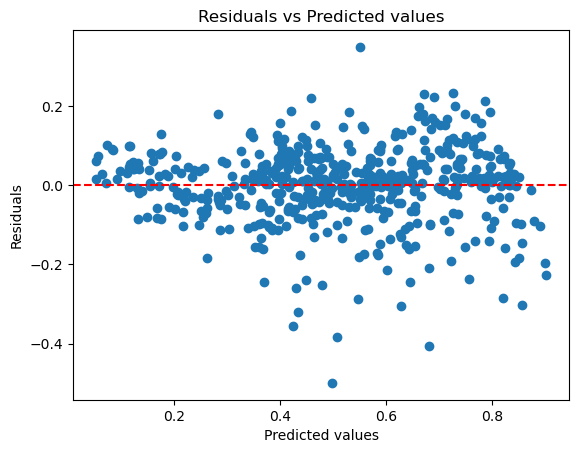

In [57]:
#Residuals vs predicted graph

plt.scatter(y_train_pred, y_train - y_train_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

In [58]:
# The residuals are randomly scattered around 0 which conveys that the relationship between the independent and dependent variables is linear
# Also Heteroscedasticity is not an issue because the values are randomly dispersed

In [59]:
# This is the final R Square on predicted set (This was suggested to do in teh problem statement)
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8143554447128104

In [60]:
# R-squared
r_squared = r2_score(y_train, y_train_pred)
print('R-squared:', r_squared)

# Mean Squared Error
mse = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error:', mse)

R-squared: 0.8059181554595186
Mean Squared Error: 0.009770647389067424


In [61]:
# Final regression equation

Y = ""
for idx, coef in enumerate (lm1.params):
    Y = Y +" + "+ str(lm1.params.index[idx]) +"*"+ str(round(coef,2))
Y= Y[3:]

print(f"Equation of Regression Line is\n\n= {Y}")

Equation of Regression Line is

= const*0.41 + year*0.23 + temperature*0.53 + humidity*-0.33 + windspeed*-0.22 + month_jul*-0.09 + month_sep*0.05 + season_spring*-0.1 + season_winter*0.06


In [62]:
# Final comments 

#Constant (0.41): This is the baseline demand
#Year (0.23): Each additional year increases bike demand by 0.23 units, indicating growing popularity or usage over time.
#Temperature (0.53): A rise in temperature by 1 degree leads to an increase in bike demand by 0.51 units, suggesting that warmer weather supports demand
#Humidity (-0.33): An increase in humidity results in a decrease in demand by 0.33 units
#windspeed (-0.22): An increase in windspeed results in a decrease in demand by 0.22 units
#Seasonality Effects: The coefficients for months and seasons indicate there are variations in demand depending on teh month/season though minor but worth considering when poredictind demand



SyntaxError: illegal target for annotation (4014877851.py, line 3)